In [1]:
from OFDM import *
%matplotlib inline

In [2]:
known_seq_dec = np.genfromtxt("handouts/week_2_challenge/a7r56tu_knownseq.csv", delimiter=r"\s+")

known_seq = np.array([])

for b in known_seq_dec:
    x = format(int(b),'02b')
    for i in x:
        known_seq = np.append(known_seq, int(i))

# Question 1

In [3]:
rx = receiver(ofdm_symbol_size= 4096, cp_length=0, modulation="QPSK", fs=48000, end_sync=False)

# Skip over known symbols
rx.gap_length = rx.ofdm_symbol_size

In [4]:
fs, signal = wavfile.read("handouts/week_2_challenge/a7r56tu_received.wav")
rx.fs = fs
signal = signal / 30000

In [5]:
rx_bits = rx.receive(signal)

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               0 
Modulation method:                  QPSK 
Sync Method:                        chirp
Number of received OFDM symbols:    2894
Number of received bits:            11848036


In [6]:
save_file(rx_bits)

File Name: a7r56tu.gif
File Size: 1476376 bytes


# Question 2

In [3]:
fs, signal = wavfile.read("handouts/week_2_challenge/b8v89t_received.wav")
signal = signal / 10000

In [4]:
rx = receiver(ofdm_symbol_size= 4096, cp_length=0, modulation="QPSK", fs=fs, sync_method = 'schmidlcox')

96234
2047


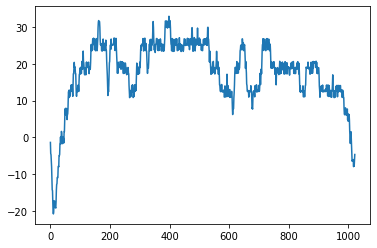

In [5]:
d_set = np.arange(0,5*fs)
L = 2048
r = signal
K = 4096
sto = K
#d_set = np.arange(0, sto + K)

# Method 2 to calculate P(d)
P0 = 0  # initialize P[0] with the default method

def calcP_method2(r, d_set, P0):
    P2 = np.zeros(len(d_set), dtype=complex)
    P2[0] = P0
    for d in d_set[:-1]:
        P2[d+1] = P2[d] + r[d+L].conj()*r[d+2*L] - r[d].conj()*r[d+L]
    return P2

P = calcP_method2(r, d_set, P0)

zero_index = np.where(abs(P) == np.amax(abs(P)))[0][0] - 1
print(zero_index)

x = zero_index - 50
y = zero_index + 50

#plt.plot(signal[x:y], label="signal")
#plt.plot(P.real[x:y], label="P")
#plt.axvline(50, color='red', label="zero index")
#plt.legend()


r = r[zero_index:zero_index+K]
s = np.fft.fft(r)
s = s[1:2047]
s = s[::2]

q = rx.map(rx.SP(known_seq))
q = q.reshape(-1)[:1023]
plt.plot(np.unwrap(np.angle(s/q)))
print(rx.K)

In [6]:
rx_bits = rx.receive(signal)

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               0 
Modulation method:                  QPSK 
Sync Method:                        schmidlcox
Number of received OFDM symbols:    1519
Number of received bits:            6218786


In [10]:
file_name, data = save_file(rx_bits)
#wavfile.write(file_name, 22050, data)
rx.K

File Name: b8v89t.wav
File Size: 761956 bytes


2047

In [9]:
Audio("output_files/" + file_name)

# Question 3

In [3]:
fs, signal = wavfile.read("handouts/week_2_challenge/c9a71v_received.wav")
signal = signal / 10000

In [4]:
rx = receiver(ofdm_symbol_size= 4096, cp_length=100, modulation="QPSK", fs=48000, no_pilots=100, pilot_sequence=known_seq, sync_method = 'schmidlcox', end_sync=False)

In [5]:
rx_bits = rx.receive(signal)

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               100 
Modulation method:                  QPSK 
Sync Method:                        schmidlcox
Number of received OFDM symbols:    600
Number of received bits:            2047000


In [6]:
file_name, data = save_file(rx_bits)

File Name: zq³ c°úÉ8PR±uv`"¤ZÀPÉ'FVVÜË)ÁÛÑÔMCÇcEJã02ÕChQRR	YÀýNGivÓÆ
tAS#GQ^c
File Size: ÄuÔ bytes


ValueError: invalid literal for int() with base 10: 'ÄuÔ'

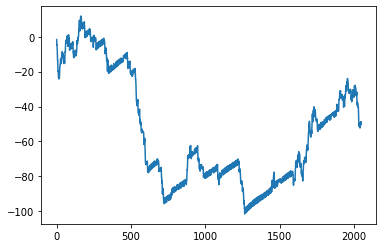

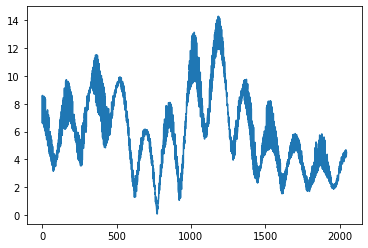

In [7]:
plt.plot(np.unwrap(np.angle(rx.Hest)))
plt.show()
plt.plot(abs(rx.Hest))